# Florestas Aleatórias

**Florestas Aleatórias (Random Forests)** são um conjunto de algoritmos de aprendizado de máquina baseados em árvores de decisão, utilizados para tarefas de **classificação** e **regressão**. São um tipo de **modelo de ensemble** que combina múltiplas árvores para melhorar a **precisão** e **robustez** das previsões.

## Conceitos-Chave

- **Ensemble Learning**: Combina vários modelos fracos (árvores de decisão) para formar um modelo forte.
- **Bagging (Bootstrap Aggregating)**: Amostragem com reposição dos dados de treino para gerar subconjuntos diferentes para cada árvore.
- **Árvores de Decisão**: Modelos individuais que tomam decisões com base em divisões binárias dos dados.

## Como Funciona

1. Gera-se diversas amostras aleatórias do conjunto de dados original (com reposição).
2. Cada amostra treina uma árvore de decisão individual.
3. No momento da previsão:
   - **Classificação**: usa votação majoritária (maioria das árvores).
   - **Regressão**: faz a média das saídas das árvores.

## Técnicas e Estratégias Utilizadas

- **Random Subspace Method**: Seleção aleatória de um subconjunto de features para cada divisão em cada árvore, aumentando a diversidade entre as árvores.
- **Out-of-Bag (OOB) Error**: Estimativa da performance do modelo sem a necessidade de validação cruzada, usando as amostras não selecionadas para cada árvore.
- **Feature Importance**: Métrica que avalia a importância relativa de cada variável para as previsões do modelo.

## Vantagens

- Reduz **overfitting** em comparação com árvores individuais.
- Funciona bem com dados grandes e com muitas variáveis.
- Lida bem com dados faltantes e categóricos.
- Pode estimar **importância de variáveis**.

## Desvantagens

- Pode ser computacionalmente custoso com muitos dados ou árvores.
- Menos interpretável do que uma única árvore de decisão.
- Não extrapola bem em tarefas de regressão (pouco eficaz fora da faixa dos dados observados).

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
# conjunto de dados sintético
X, y = make_classification(n_samples=1000,   # número de amostras
                           n_features=20,    # número de atributos
                           n_informative=15, # número de atributos informativos
                           n_redundant=5,    # número de atributos redundantes
                           n_classes=2,      # classificação binária
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# classificadores
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

# ensemble com votação hard
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

# treinar o ensemble
voting_clf.fit(X_train, y_train)

# avaliar
y_pred = voting_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do VotingClassifier: {acc:.2f}")

Acurácia do VotingClassifier: 0.89


## Bagging

Bagging, ou *Bootstrap Aggregating*, é uma técnica fundamental utilizada em **Random Forests** para melhorar a precisão e reduzir o overfitting. Nela são geradas múltiplas amostras aleatórias com reposição (bootstraps) a partir do conjunto de dados original, e para cada uma dessas amostras é treinada uma árvore de decisão independente. Ao final, as previsões de todas as árvores são combinadas — por maioria de votos para classificação ou média para regressão — resultando em um modelo mais robusto e estável, que generaliza melhor para dados não vistos.

### Parâmetros:

- n_estimators=500: é o número de árvores na floresta. Quanto maior o número, maior a precisão

- max_samples=100: cada árvore não vai olhar todos os dados, mas só 100 exemplos escolhidos aleatoriamente (com reposição)

- n_jobs=-1: usar todos os núcleos do computador para fazer isso o mais rápido possível

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
                DecisionTreeClassifier(), n_estimators=500,
                max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

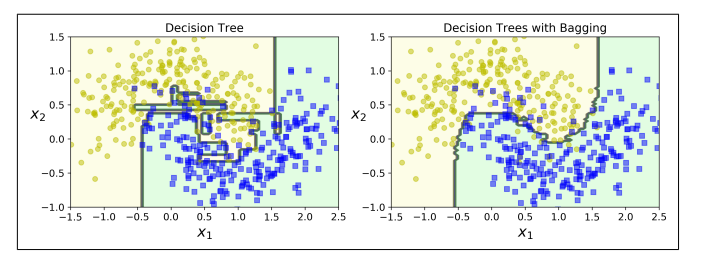

In [9]:
bag_clf.oob_score_ # estimativa de perfomance sem validação cruzada

0.86

In [8]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8466666666666667

## Feature Importance

A métrica de **Feature Importance** em Random Forests indica o grau de contribuição de cada variável para as decisões tomadas pelo modelo. Durante o treinamento, cada árvore avalia quais variáveis são mais eficazes para realizar divisões que melhor separam os dados. A importância de uma feature é calculada com base na redução do erro (ou impureza) proporcionada por ela em todos os nós das árvores. Ao final, o modelo agrega essas contribuições e atribui um valor de importância relativo a cada variável, permitindo interpretar quais atributos foram mais relevantes para as previsões.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)

rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09940180488505018
sepal width (cm) 0.02302645607027148
petal length (cm) 0.45680163073297664
petal width (cm) 0.42077010831170164


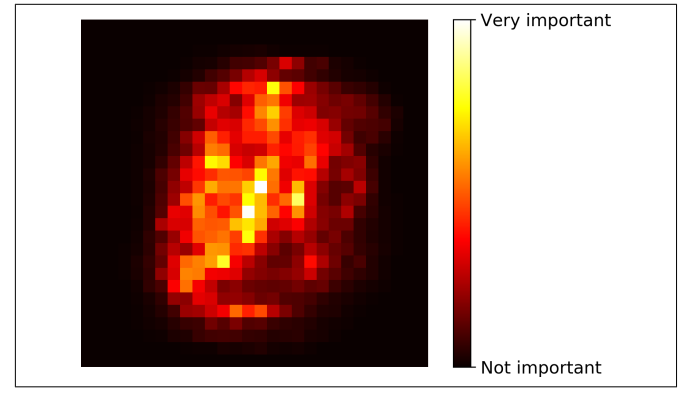

## Gradient Boosting e XGBoost

**Gradient Boosting** é uma técnica de aprendizado de máquina baseada em conjuntos de modelos fracos, geralmente árvores de decisão, que são treinados sequencialmente. A ideia central é que cada novo modelo corrige os erros cometidos pelos anteriores, otimizando a performance do conjunto como um todo. O **XGBoost** (*Extreme Gradient Boosting*) é uma implementação otimizada e mais eficiente do Gradient Boosting, com melhorias em velocidade, regularização (para evitar overfitting) e capacidade de lidar com dados esparsos. Por isso, na prática, quando se usa o XGBoost, está se utilizando uma versão mais avançada do Gradient Boosting.

In [16]:
from xgboost import XGBClassifier

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# cria o modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# treina o modelo
model.fit(X_train, y_train)

# previsões
y_pred = model.predict(X_test)

# avalia a acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 1.0


c:\Users\BeatrizAlmeida\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:20:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


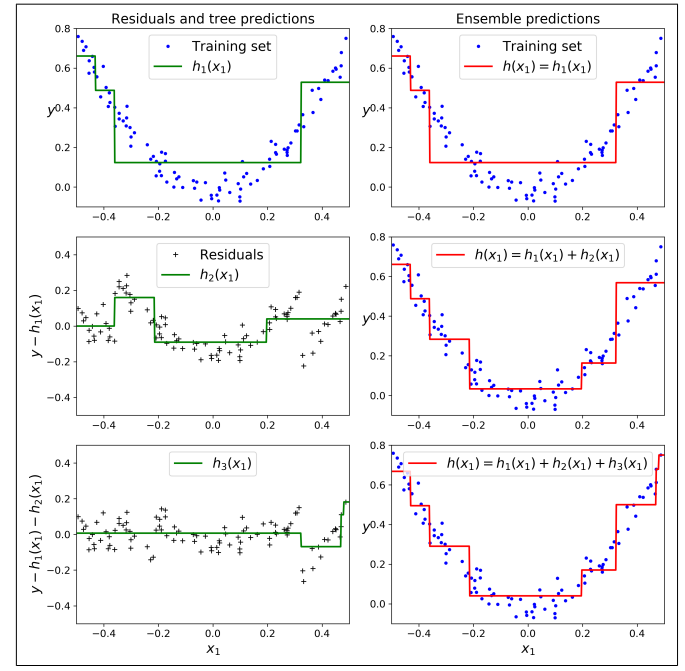